<a href="https://colab.research.google.com/github/JSEFERINO/Dise-o_de_Experimentos_DOE/blob/main/Dise%C3%B1o_de_Experimentos_con_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Diseño en cuadro latino - R***

---

In [1]:
install.packages("multcomp")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’




Librerias

In [2]:
library(dplyr)
library(ggplot2)
library(stats)
library(multcomp)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




Datos

In [3]:

FILTRO <- c('F1','F1','F1','F2','F2','F2', 'F1','F1','F1','F2','F2','F2',
            'F1','F2','F2','F1','F2','F1', 'F2','F2','F1','F1','F1','F2',
            'F2','F1','F2','F2','F1','F1', 'F2','F2','F2','F1','F1','F1')

RUIDO <- c('R1','R2','R3','R1','R3','R2', 'R3','R1','R2','R3','R2','R1',
           'R2','R2','R3','R1','R1','R3', 'R2','R1','R1','R2','R3','R3',
           'R3','R3','R1','R2','R1','R2', 'R1','R3','R2','R3','R2','R1')

MOMENTO <- c('M1','M1','M1','M1','M1','M1', 'M2','M2','M2','M2','M2','M2',
             'M3','M3','M3','M3','M3','M3', 'M4','M4','M4','M4','M4','M4',
             'M5','M5','M5','M5','M5','M5', 'M6','M6','M6','M6','M6','M6')

OPERADOR <- c('O1','O2','O3','O4','O5','O6', 'O1','O2','O3','O4','O5','O6',
              'O1','O2','O3','O4','O5','O6', 'O1','O2','O3','O4','O5','O6',
              'O1','O2','O3','O4','O5','O6', 'O1','O2','O3','O4','O5','O6')

Intensidad <- c(90, 106, 108, 81, 90, 88, 114, 96, 105, 83, 86, 84,
                102 , 90 , 95 , 92 , 85 , 104, 87, 84, 100, 96, 110, 91,
                93 , 112 , 92 , 80 , 90 , 98, 86 , 91 , 97 , 98 , 100 , 92)

Combinacion <- c('A','B','C','D','F','E',
                 'C','A','B','F','E','D',
                 'B','E','F','A','D','C',
                 'E','D','A','B','C','F',
                 'F','C','D','E','A','B',
                 'D','F','E','C','B','A')

DataFrame

In [4]:
# Crear el DataFrame
df1 <- data.frame(
  MOMENTO = MOMENTO,
  OPERADOR = OPERADOR,
  Intensidad = Intensidad,
  FILTRO = FILTRO,
  RUIDO = RUIDO,
  Combinacion=Combinacion
)


**Sumas y medias de los tratamientos**

In [5]:
# Calculo de las sumas y medias de los tratamientos
summary <- df1 %>%
  group_by(Combinacion) %>%
  summarise(Intensidad = sum(Intensidad)) %>%
  mutate(suma_T2 = Intensidad^2, media_T = Intensidad / 6)

# Calculo de sumas totales
sum_Y_ij <- sum(summary$Intensidad)
sum_Tr_2 <- sum(summary$Intensidad^2)
sum_Y2_ij <- sum(df1$Intensidad^2)

# Crear un DataFrame para los totales
totals <- data.frame(Combinacion = c("sum_Y_ij", "sum_Y2_ij"),
                     Intensidad = c(sum_Y_ij, sum_Y2_ij),
                     suma_T2 = c(sum_Y_ij^2, sum_Tr_2),
                     media_T = c(NA, NA))

# Concatenar los totales al resumen
final_summary <- rbind(summary, totals)

# Mostrar la tabla
print("Resumen por combinacion:")
print(final_summary)



[1] "Resumen por combinacion:"
# A tibble: 8 × 4
  Combinacion Intensidad  suma_T2 media_T
  <chr>            <dbl>    <dbl>   <dbl>
1 A                  560   313600    93.3
2 B                  607   368449   101. 
3 C                  646   417316   108. 
4 D                  512   262144    85.3
5 E                  528   278784    88  
6 F                  543   294849    90.5
7 sum_Y_ij          3396 11532816    NA  
8 sum_Y2_ij       323154  1935142    NA  


**Sumas y medias para los bloques**

In [6]:

# Sumas y medias por MOMENTO
summary_m <- df1 %>%
  group_by(MOMENTO) %>%
  summarise(Intensidad = sum(Intensidad)) %>%
  mutate(suma_T2 = Intensidad^2, media_T = Intensidad / 6)

# Añadir las filas de totales
totals_m <- data.frame(MOMENTO = "sum_Y_ij", Intensidad = sum(summary_m$Intensidad), media_T = NA, suma_T2 = sum(summary_m$Intensidad)^2)
final_summary_m <- rbind(summary_m, totals_m)

# Mostrar la tabla
print("Tabla resumen por momento del dia:")
print(final_summary_m)

# Sumas y medias por OPERADOR
summary_o <- df1 %>%
  group_by(OPERADOR) %>%
  summarise(Intensidad = sum(Intensidad)) %>%
  mutate(suma_T2 = Intensidad^2, media_T = Intensidad / 6)

totals_o <- data.frame(OPERADOR = "sum_Y_ij", Intensidad = sum(summary_o$Intensidad), media_T = NA, suma_T2 = sum(summary_o$Intensidad)^2)
final_summary_o <- rbind(summary_o, totals_o)
cat("\n\n")
print("Tabla resumen por operador:")
print(final_summary_o)


[1] "Tabla resumen por momento del dia:"
# A tibble: 7 × 4
  MOMENTO  Intensidad  suma_T2 media_T
  <chr>         <dbl>    <dbl>   <dbl>
1 M1              563   316969    93.8
2 M2              568   322624    94.7
3 M3              568   322624    94.7
4 M4              568   322624    94.7
5 M5              565   319225    94.2
6 M6              564   318096    94  
7 sum_Y_ij       3396 11532816    NA  


[1] "Tabla resumen por operador:"
# A tibble: 7 × 4
  OPERADOR Intensidad  suma_T2 media_T
  <chr>         <dbl>    <dbl>   <dbl>
1 O1              572   327184    95.3
2 O2              579   335241    96.5
3 O3              597   356409    99.5
4 O4              530   280900    88.3
5 O5              561   314721    93.5
6 O6              557   310249    92.8
7 sum_Y_ij       3396 11532816    NA  


**Sumas y medias por Filtro y Ruido**

In [7]:
# Sumas y medias por FILTRO y RUIDO
summary_filtro <- df1 %>%
  group_by(FILTRO) %>%
  summarise(Suma_Intensidad = sum(Intensidad), Media_Intensidad = mean(Intensidad)) %>%
  mutate(suma_T2 = Suma_Intensidad^2)

summary_ruido <- df1 %>%
  group_by(RUIDO) %>%
  summarise(Suma_Intensidad = sum(Intensidad), Media_Intensidad = mean(Intensidad)) %>%
  mutate(suma_T2 = Suma_Intensidad^2)

# Añadir las filas totales
totals_filtro <- data.frame(FILTRO = "sum_Y_ij", Suma_Intensidad = sum(summary_filtro$Suma_Intensidad), Media_Intensidad = NA, suma_T2 = sum(summary_filtro$Suma_Intensidad)^2)
summary_filtro <- rbind(summary_filtro, totals_filtro)

totals_ruido <- data.frame(RUIDO = "sum_Y_ij", Suma_Intensidad = sum(summary_ruido$Suma_Intensidad), Media_Intensidad = NA, suma_T2 = sum(summary_ruido$Suma_Intensidad)^2)
summary_ruido <- rbind(summary_ruido, totals_ruido)

print("Resumen por filtro:")
print(summary_filtro)
cat("\n\n")
print("Resumen por ruido:")
print(summary_ruido)


[1] "Resumen por filtro:"
# A tibble: 3 × 4
  FILTRO   Suma_Intensidad Media_Intensidad  suma_T2
  <chr>              <dbl>            <dbl>    <dbl>
1 F1                  1813            101.   3286969
2 F2                  1583             87.9  2505889
3 sum_Y_ij            3396             NA   11532816


[1] "Resumen por ruido:"
# A tibble: 4 × 4
  RUIDO    Suma_Intensidad Media_Intensidad  suma_T2
  <chr>              <dbl>            <dbl>    <dbl>
1 R1                  1072             89.3  1149184
2 R2                  1135             94.6  1288225
3 R3                  1189             99.1  1413721
4 sum_Y_ij            3396             NA   11532816


**Varianza y variabilidad**

In [8]:
# Cálculo de varianzas
k <- 6
SCTr <- sum_Tr_2 / k - sum_Y_ij^2 / k^2
CMTr <- SCTr / (k - 1)
print(paste("Variabilidad de los tratamientos es =", SCTr))
print(paste("Varianza de los tratamientos es =", CMTr))

SCB1 <- sum(summary_m$suma_T2) / k - sum_Y_ij^2 / k^2
CMB1 <- SCB1 / (k - 1)
SCB2 <- sum(summary_o$suma_T2) / k - sum(summary_o$Intensidad)^2 / k^2
CMB2 <- SCB2 / (k - 1)

print(paste("Variabilidad de Bloque 1 es =", SCB1))
print(paste("Varianza de Bloque 1 es =", CMB1))
print(paste("Variabilidad de Bloque 2 es =", SCB2))
print(paste("Varianza de Bloque 2 es =", CMB2))

# Variabilidad y error
SCD <- sum_Y2_ij - sum_Y_ij^2 / k^2
CMD <- SCD / (k^2 - 1)
SCE <- SCD - SCTr - SCB1 - SCB2
CME <- SCE / ((k - 2) * (k - 1))

print(paste("Variabilidad Total es =", SCD))
print(paste("Varianza Total es =", CMD))
print(paste("Variabilidad del error es =", SCE))
print(paste("Varianza del error es =", CME))

# Filtro

# Calculo de la suma de las intensidades para cada nivel de FILTRO
sumas_filtro <- aggregate(Intensidad ~ FILTRO, data = df1, sum)

# Suma de los cuadrados de las sumas
sumc_sum_filtro <- sum(sumas_filtro$Intensidad^2)

# Sumar la intensidad total
sum_Yij <- sum(df1$Intensidad)

I <- length(unique(df1$FILTRO))  # Niveles de FILTRO
J <- length(unique(df1$RUIDO))   # Niveles de RUIDO
n <- 6  # Número de repeticiones por combinación
N <- I * J * n  # Total de observaciones

SSF <- sumc_sum_filtro / (J * n) - (sum_Yij^2 / N)
MSF <- SSF / (I - 1)

cat('Variabilidad (Sum cuadrados) del Filtro: ', SSF, '\n')
cat('Varianza (Med cuadrados Filtro) del filtro: ', MSF, '\n')

# Calculo de la Varianza y variabilidad para cada FILTRO
summary_filtro <- aggregate(Intensidad ~ FILTRO, data = df1,
                            FUN = function(x) c(sum = sum(x), mean = mean(x), var = var(x)))
summary_filtro <- do.call(data.frame, summary_filtro)

# Renombrar columnas
names(summary_filtro) <- c('FILTRO', 'Suma_Intensidad', 'Media_Intensidad', 'Varianza')

# Mostrar las tablas
cat('\nResumen por FILTRO:\n')
print(summary_filtro)


# Ruido

# Calculo de la suma de las intensidades para cada nivel de RUIDO
sumas_ruido <- aggregate(Intensidad ~ RUIDO, data = df1, sum)

# Suma de los cuadrados de las sumas de intensidades por nivel de RUIDO
sumc_sum_ruido <- sum(sumas_ruido$Intensidad^2)

SSR <- sumc_sum_ruido / (I * n) - (sum_Yij^2 / N)
MSR <- SSR / (J - 1)
cat("\n\n")
cat('\nVariabilidad de los ruidos: ', SSR, '\n')
cat('Varianza de los ruidos: ', MSR, '\n')

# Calculo de Varianza y variabilidad para cada RUIDO
summary_ruido <- aggregate(Intensidad ~ RUIDO, data = df1,
                           FUN = function(x) c(sum = sum(x), mean = mean(x), var = var(x)))
summary_ruido <- do.call(data.frame, summary_ruido)

# Renombrar columnas
names(summary_ruido) <- c('RUIDO', 'Suma_Intensidad', 'Media_Intensidad', 'Varianza')

# Mostrar las tablas
cat('\nResumen por RUIDO:\n')
print(summary_ruido)



[1] "Variabilidad de los tratamientos es = 2167.66666666669"
[1] "Varianza de los tratamientos es = 433.533333333337"
[1] "Variabilidad de Bloque 1 es = 4.33333333331393"
[1] "Varianza de Bloque 1 es = 0.866666666662786"
[1] "Variabilidad de Bloque 2 es = 428"
[1] "Varianza de Bloque 2 es = 85.6"
[1] "Variabilidad Total es = 2798"
[1] "Varianza Total es = 79.9428571428571"
[1] "Variabilidad del error es = 198"
[1] "Varianza del error es = 9.9"
Variabilidad (Sum cuadrados) del Filtro:  1469.444 
Varianza (Med cuadrados Filtro) del filtro:  1469.444 

Resumen por FILTRO:
  FILTRO Suma_Intensidad Media_Intensidad Varianza
1     F1            1813        100.72222 55.50654
2     F2            1583         87.94444 22.64379



Variabilidad de los ruidos:  571.5 
Varianza de los ruidos:  285.75 

Resumen por RUIDO:
  RUIDO Suma_Intensidad Media_Intensidad  Varianza
1    R1            1072         89.33333  30.60606
2    R2            1135         94.58333  68.26515
3    R3            1189   

**Anova**

In [9]:
# ANOVA

anova_data <- data.frame(
  Fuente = c('Tratamiento', 'MOMENTO', 'OPERADOR', 'Error', 'Total'),
  SS = c(SCTr, SCB1, SCB2, SCE, SCD),
  g.l = c(k - 1, k - 1, k - 1, (k - 2) * (k - 1), k^2 - 1),
  MS = c(CMTr, CMB1, CMB2, CME, ''),
  F = c(CMTr / CME, CMB1 / CME, CMB2 / CME, '', ''),
  valor_p = c(1 - pf(CMTr / CME, k - 1, (k - 2) * (k - 1)),
              1 - pf(CMB1 / CME, k - 1, (k - 2) * (k - 1)),
              1 - pf(CMB2 / CME, k - 1, (k - 2) * (k - 1)), '', '')
)

cat("Tabla ANOVA:\n")
print(anova_data)


Tabla ANOVA:
       Fuente          SS g.l                MS                  F
1 Tratamiento 2167.666667   5  433.533333333337   43.7912457912462
2     MOMENTO    4.333333   5 0.866666666662786 0.0875420875416956
3    OPERADOR  428.000000   5              85.6   8.64646464646465
4       Error  198.000000  20               9.9                   
5       Total 2798.000000  35                                     
               valor_p
1 4.25006585480503e-10
2    0.993364805414381
3 0.000171038122347977
4                     
5                     


**Prueba Tukey**

Resultados de la prueba de Tukey:
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Intensidad ~ Combinacion, data = df1)

$Combinacion
          diff         lwr          upr     p adj
B-A   7.833333  -0.2160973  15.88276395 0.0600653
C-A  14.333333   6.2839027  22.38276395 0.0000978
D-A  -8.000000 -16.0494306   0.04943062 0.0521592
E-A  -5.333333 -13.3827640   2.71609728 0.3577334
F-A  -2.833333 -10.8827640   5.21609728 0.8890856
C-B   6.500000  -1.5494306  14.54943062 0.1697345
D-B -15.833333 -23.8827640  -7.78390272 0.0000203
E-B -13.166667 -21.2160973  -5.11723605 0.0003323
F-B -10.666667 -18.7160973  -2.61723605 0.0043148
D-C -22.333333 -30.3827640 -14.28390272 0.0000000
E-C -19.666667 -27.7160973 -11.61723605 0.0000004
F-C -17.166667 -25.2160973  -9.11723605 0.0000051
E-D   2.666667  -5.3827640  10.71609728 0.9117471
F-D   5.166667  -2.8827640  13.21609728 0.3920206
F-E   2.500000  -5.5494306  10.54943062 0.9313782



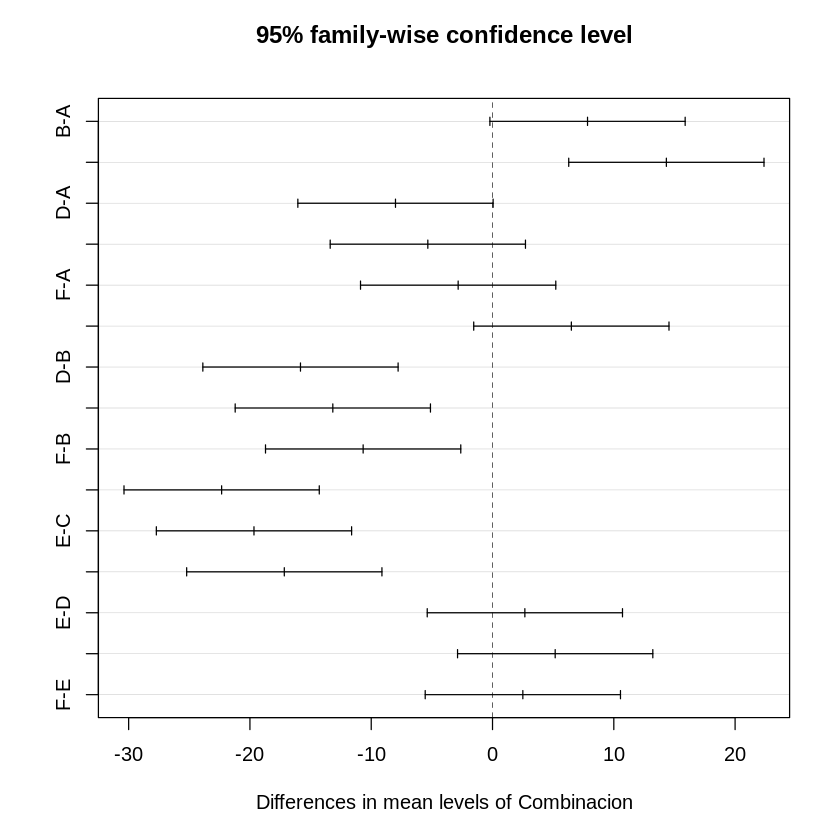

In [10]:
# Prueba de Tukey
model <- aov(Intensidad ~ Combinacion, data = df1)
tukey <- TukeyHSD(model, "Combinacion")

cat("Resultados de la prueba de Tukey:\n")
print(tukey)

# Boxplot de Tukey
plot(tukey)


**Comparaciones múltiples: Intensidad VS Momento del día**

Resultados de la prueba de Tukey para Momento de día:
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Intensidad ~ MOMENTO, data = df1)

$MOMENTO
               diff       lwr      upr     p adj
M2-M1  8.333333e-01 -16.11267 17.77934 0.9999884
M3-M1  8.333333e-01 -16.11267 17.77934 0.9999884
M4-M1  8.333333e-01 -16.11267 17.77934 0.9999884
M5-M1  3.333333e-01 -16.61267 17.27934 0.9999999
M6-M1  1.666667e-01 -16.77934 17.11267 1.0000000
M3-M2 -1.421085e-14 -16.94600 16.94600 1.0000000
M4-M2 -1.421085e-14 -16.94600 16.94600 1.0000000
M5-M2 -5.000000e-01 -17.44600 16.44600 0.9999991
M6-M2 -6.666667e-01 -17.61267 16.27934 0.9999962
M4-M3  0.000000e+00 -16.94600 16.94600 1.0000000
M5-M3 -5.000000e-01 -17.44600 16.44600 0.9999991
M6-M3 -6.666667e-01 -17.61267 16.27934 0.9999962
M5-M4 -5.000000e-01 -17.44600 16.44600 0.9999991
M6-M4 -6.666667e-01 -17.61267 16.27934 0.9999962
M6-M5 -1.666667e-01 -17.11267 16.77934 1.0000000



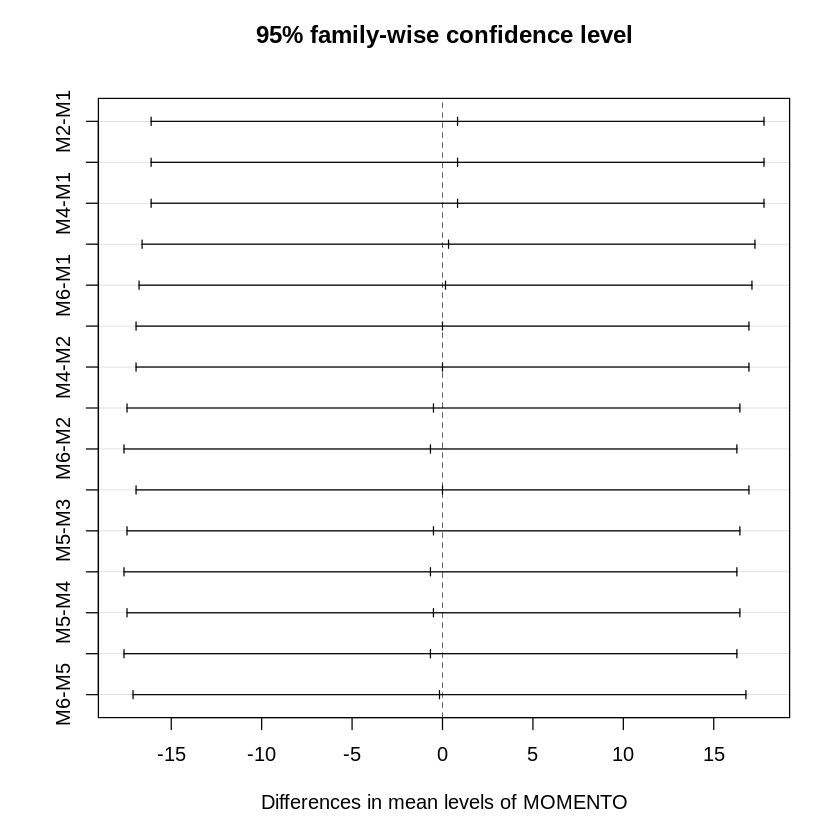

In [11]:
# Prueba de Tukey para MOMENTO
model_momento <- aov(Intensidad ~ MOMENTO, data = df1)
tukey_momento <- TukeyHSD(model_momento, "MOMENTO")

# Resultados de la prueba de Tukey para MOMENTO
cat("Resultados de la prueba de Tukey para Momento de día:\n")
print(tukey_momento)

# Boxplot de Tukey para MOMENTO
plot(tukey_momento)


**Comparaciones múltiples: Intensidad VS Operador**

Resultados de la prueba de Tukey para OPERADOR:
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Intensidad ~ OPERADOR, data = df1)

$OPERADOR
             diff       lwr       upr     p adj
O2-O1   1.1666667 -14.44158 16.774916 0.9999073
O3-O1   4.1666667 -11.44158 19.774916 0.9630566
O4-O1  -7.0000000 -22.60825  8.608249 0.7473118
O5-O1  -1.8333333 -17.44158 13.774916 0.9991537
O6-O1  -2.5000000 -18.10825 13.108249 0.9962778
O3-O2   3.0000000 -12.60825 18.608249 0.9913238
O4-O2  -8.1666667 -23.77492  7.441583 0.6102121
O5-O2  -3.0000000 -18.60825 12.608249 0.9913238
O6-O2  -3.6666667 -19.27492 11.941583 0.9786714
O4-O3 -11.1666667 -26.77492  4.441583 0.2781988
O5-O3  -6.0000000 -21.60825  9.608249 0.8476792
O6-O3  -6.6666667 -22.27492  8.941583 0.7831429
O5-O4   5.1666667 -10.44158 20.774916 0.9120174
O6-O4   4.5000000 -11.10825 20.108249 0.9491467
O6-O5  -0.6666667 -16.27492 14.941583 0.9999942



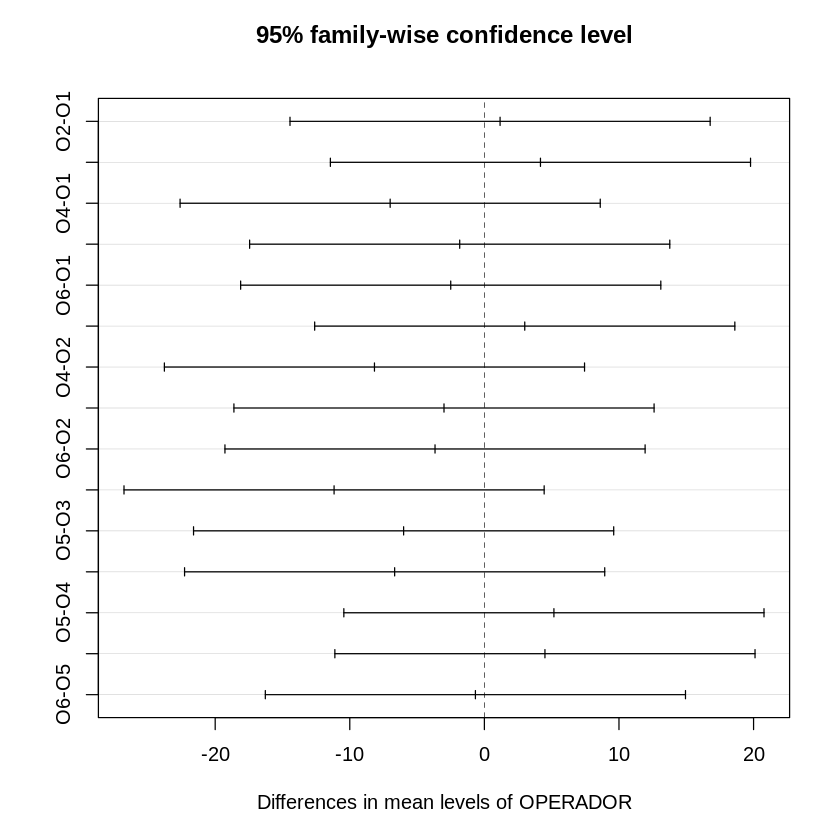

In [12]:
# Prueba de Tukey para operadores
model_operador <- aov(Intensidad ~ OPERADOR, data = df1)
tukey_operador <- TukeyHSD(model_operador, "OPERADOR")

# Resultados de la prueba de Tukey para operadores
cat("Resultados de la prueba de Tukey para OPERADOR:\n")
print(tukey_operador)

# Boxplot de Tukey para momento
plot(tukey_operador)

**BOXPLOT**

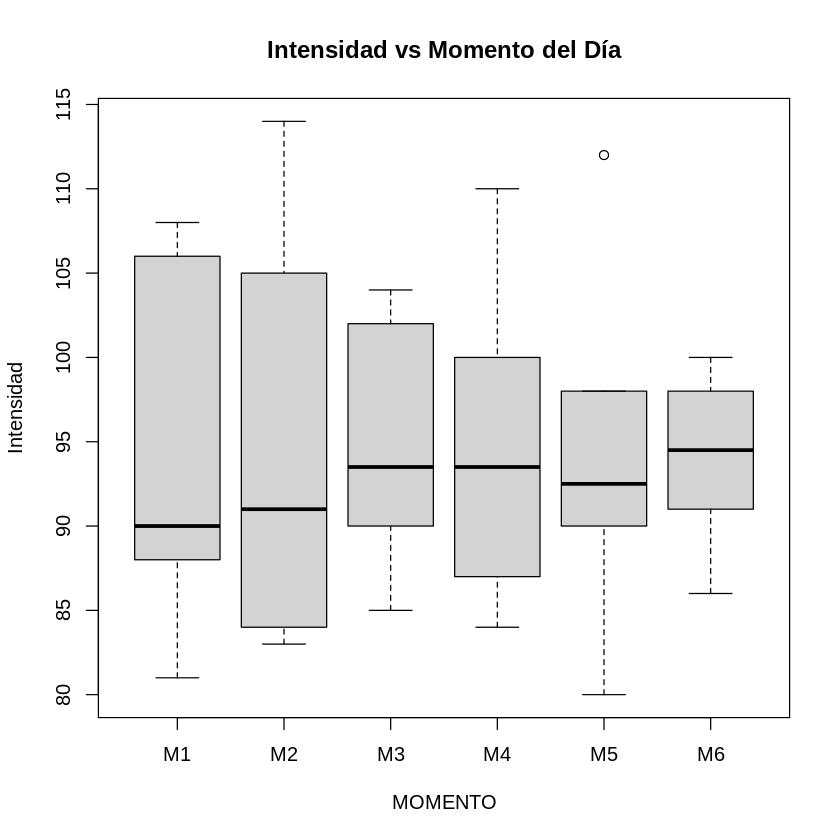

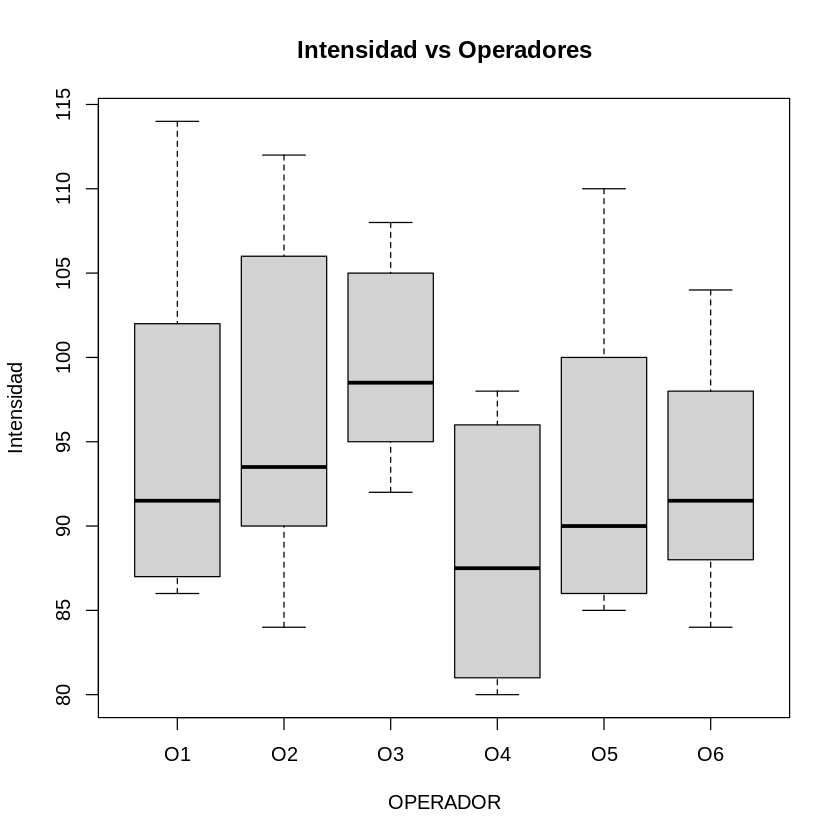

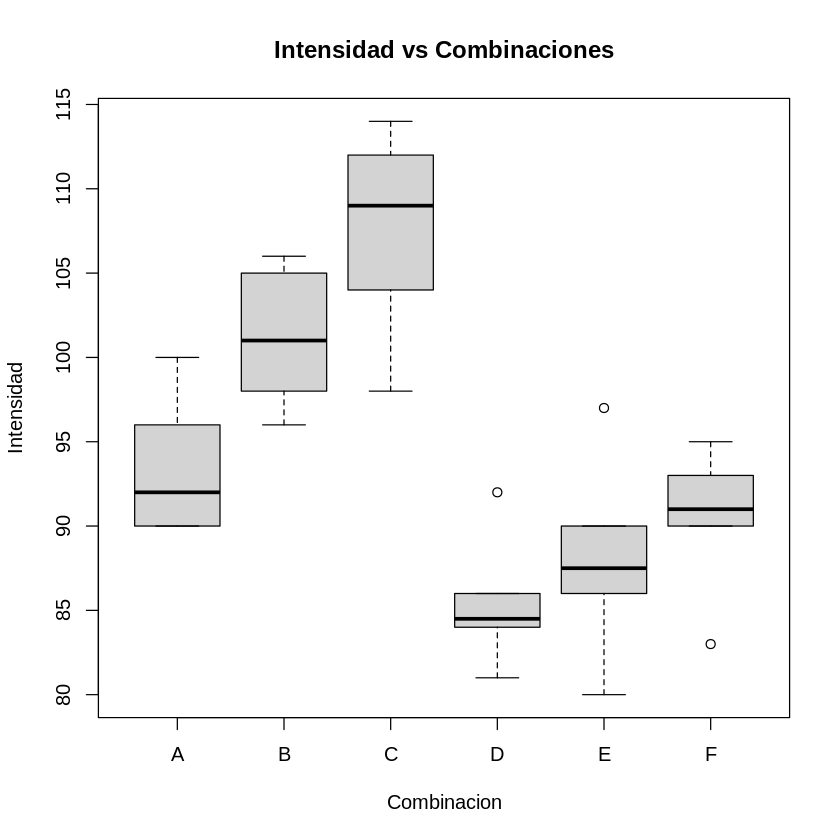

In [13]:
# Boxplot para Tukey
boxplot(Intensidad ~ MOMENTO, data = df1, main = "Intensidad vs Momento del Día")
boxplot(Intensidad ~ OPERADOR, data = df1, main = "Intensidad vs Operadores")
boxplot(Intensidad ~ Combinacion, data = df1, main = "Intensidad vs Combinaciones")
